In [45]:
# Alunos: Guilherme da Silva Veroneze, Hudson Loyo Guimarães e Yago Henrique Nascimento Moreira Rosestolato.
%matplotlib inline

In [46]:
import torch
import torchvision
import torchvision.transforms as transforms

In [85]:
n_epochs = 3
batch_size_train = 128
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [86]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)


test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [87]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [88]:
example_data.shape

torch.Size([1000, 1, 28, 28])

In [89]:
from matplotlib import pyplot

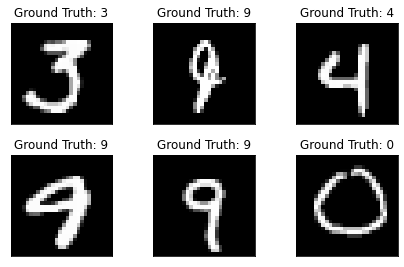

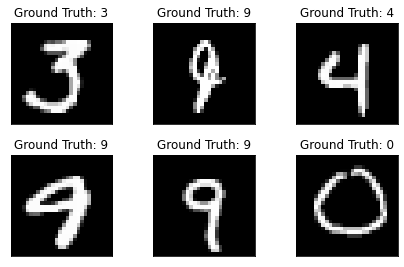

In [90]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [91]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [92]:
import torch.optim as optim

network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [93]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [94]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), '/model.pth')
      torch.save(optimizer.state_dict(), '/optimizer.pth')

In [95]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [ ]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 2.3096, Accuracy: 924/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.307494
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.305029
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.274985
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.268149
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.248344
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.259588
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.198244
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.141770
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.095135
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.081563
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.862463
Train Epoch: 1 [14080/60000 (23%)]	Loss: 1.832515
Train Epoch: 1 [15360/60000 (26%)]	Loss: 1.662894
Train Epoch: 1 [16640/60000 (28%)]	Loss: 1.484338
Train Epoch: 1 [17920/60000 (30%)]	Loss: 1.551251
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.395175
Train Epoch: 1 [20480/60000 (34%)]	Loss: 1.301825
Train Epoch: 1 [21760/60000 (36%)]	Loss: 1.254309
Train Epoch: 1 [23040/60000 (38%)]	Loss: 1.150662
Train Epoc

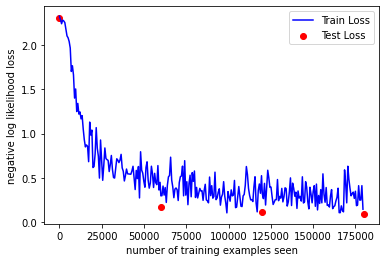

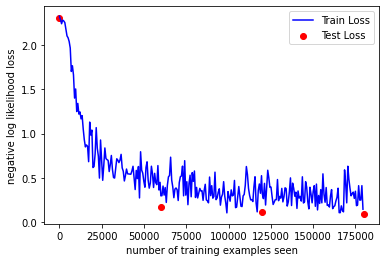

In [19]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig